# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
# the below warning seems to tell me that the cross_validation module will be renamed/moved in a coming update

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

/home/gp/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/gp/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [5]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

1. Increasing RM may lead to an increade in MEDV.  
   - more rooms would imply more square footage and living space which costs more considering many realestate holdings can be broken down to price per sqft.
   

2. Increasing LSTAT may lead to a decrease in MEDV.
    - considering LSTAT is labeling working poor it is safe to assume their capital is also low - able to afford very little in regards to housing.  Banks will not take the risk as LSTAT may not have collateral.  So any neighboorhood that can facilitate working poor prices will by definition lower the MEDV.  The working rich, demanding a different level of living conditions and standards will have a different neighboorhood - one in which prices may inhibit working poor from being able to afford. This partition may magnify the divide.
    

3. Increasing the PTRAT10 may lead to a decrease in MEDV.
    - Smaller classes = less students per teacher is favorable but like all favorables, they cost more money.  If we have a ratio of 12 students to one teacher and than double the ratio to 24 students to one teacher we are implying lower funds available and one would assume the later setup to be in working poor neighborhoods and the former setup in neighborhoods of the working rich.  If this situation occured many wealthy individuals would leave the area in search of school disticts with a more favorable, lower, studant to teacher ratio.

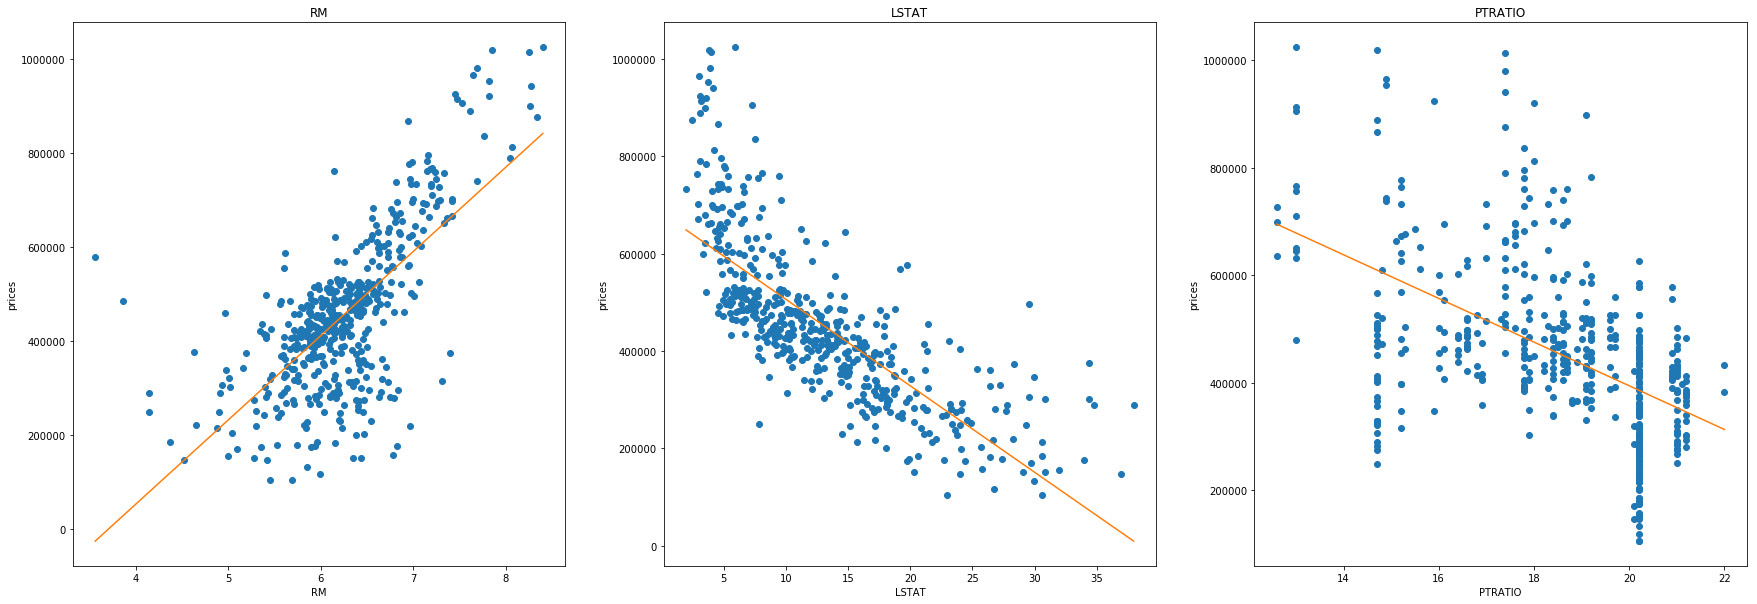

In [6]:
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

(array([ 19.,  49.,  55.,  50.,  56.,  40.,  45.,  39.,  40.,  22.,  17.,
         11.,  12.,   9.,   6.,  10.,   3.,   2.,   2.,   2.]),
 array([  1.98  ,   3.7795,   5.579 ,   7.3785,   9.178 ,  10.9775,
         12.777 ,  14.5765,  16.376 ,  18.1755,  19.975 ,  21.7745,
         23.574 ,  25.3735,  27.173 ,  28.9725,  30.772 ,  32.5715,
         34.371 ,  36.1705,  37.97  ]),
 <a list of 20 Patch objects>)

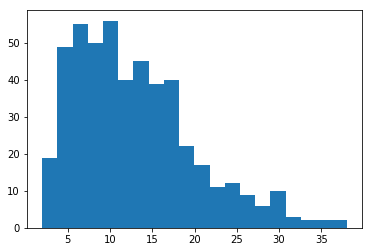

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(data.LSTAT, bins=20) #blue

(array([  1.,   1.,   4.,  10.,  10.,  17.,  24.,  25.,  35.,  35.,  40.,
         41.,  49.,  45.,  56.,  30.,  29.,  16.,  15.,   6.]),
 array([ 0.68309684,  0.83078182,  0.9784668 ,  1.12615177,  1.27383675,
         1.42152173,  1.5692067 ,  1.71689168,  1.86457666,  2.01226163,
         2.15994661,  2.30763159,  2.45531656,  2.60300154,  2.75068652,
         2.89837149,  3.04605647,  3.19374144,  3.34142642,  3.4891114 ,
         3.63679637]),
 <a list of 20 Patch objects>)

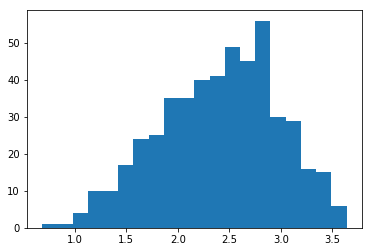

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(np.log(data.LSTAT), bins=20) # orange

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [21]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [22]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

Performance of this model has a R2 of 0.923, since r2 is always between 0 and 100% we can say our r2 is 92.3%
since r2 is the explained variation / total variation 
0% = model explains NONE of the variablity of data around the mean.
100% = model explains ALL variability of data around its mean. 

So this 92.3% provides an ESTIMATE of a strong relationship between model and response variable. It does not tell me if statistically significaint - for that I will need F-test. 

Based on the data - I do not believe this model demonstrates a strong correlation between true values and predictions. 

More data!!!!

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [23]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=13)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

A testing subset allows us to observe an honest assement of the predictive power of our model on real associated data. 

Should I test a model with the exact same dataset as the training set I would be guilty of not making a predictive model per se.  It will give me a false high score (over fitting jail).

The predicitive power of a model needs to score high with little variance when it has new data put through that the model has never seen before. We need the model to generalize over new data, not reach a training accuracy score of 100%

The larger the training data the better, it will increase accuracy but at some point it will plateau. More data seems to beat a fine-tuned algorithm each time!


----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

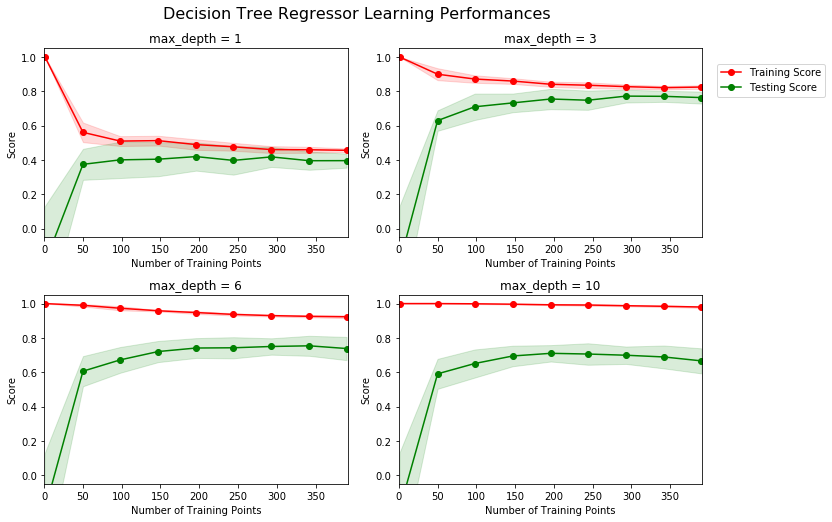

In [24]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

Max_depth =1 

    Testing score increases with the number of observations (between 0-50) and than plateau's.
    This plateau occures at a score of 0.4 so I would say this model will not generalize well if I was to introduce new unseen data to this model.
    
    Training score goes down with number of observations, to about 0.5 and plateau's, telling me the model does not fit the sampled data well. 
    
    The general plateau tells me that adding more data would not make any real change to the outcome.  Meaning more training points will likely not equate to an improvement.  Current model is UNDERfitting the data, so the improvement must be on the model (feature sets etc)
    
    ****** review added:
    As a max_depth of 1 suffers from high bias, visually this is due to the low training and validation scores(also note that it has low variance since the scores are close together). As this model is not complex enough to learn the structure of the data
    
    And a max_depth of 10 suffers from high variance, since we see a large gap between the training and validation scores, as we are basically just memorizing our training data and will not generalize well to new unseen data

    ******
Max_depth = 3

     Porbably the best depth.  
     
     The testing score is about 0.8 and increases nicely with more training sets. Seems to generalize a hellofa lot better then maxdepth 1.
     
     The training score decreases a tad with more training sets.  Also coming to about 0.8 showing it fits the data better than maxdepth 1.  
     
     This maxdepth of 3 does not seem to exhibit high variance or high bias. More data would seem to imply even slightly better results. 
     
     ****** my first reviewer commented on my comment of 
     "More data would seem to imply even slightly better results"
     
     saying: "if we look at the testing curve here, we can clearly see that it has actually converged to its optimal score, so more data is not necessary."
     
     point taken! thanks. 


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

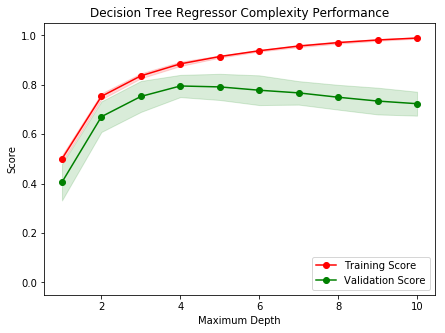

In [25]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

MAX DEPTH =1
    - both testing and traing scores are low. 
    - no real distance between training and testing scores. 
    - model not fitting data well, not genralizing well = HIGH BIAS 
    
MAX DEPTH = 10
    - training score high, testing score low.
    - real distance between training and testing scores. 
    - model fitting data well, not generalizing well. = HIGH VARIANCE

High variance
    - HV models will have a large distance between training and validation scores. Fits model well but sucks at generalizing over unseen new data. 
    - high train score but low validation score. 

High Bias
    - Does NOT fit data well and does NOT generalize well. 
    - testing and training scores are low. 
    

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

MD of 3-5

no evidence of high variance or high bias on MD of 3.  But when we get to MD of 6 we are begining to see high variance. 

REVIEWERS RESPONSE:

Good ideas!

As a max depth of 4 might have a higher validation score(which is what gridSearch searches for)
But a max depth of 3 probably does have a better bias / variance tradeoff(with closer training and validation scores), also a simpler model, which is what is recommend based on Occam's razor
Check out this visual, it refers to error, but same can be applied to accuracy(just flipped)

IMAGES NOT LOADING IN NOTEBOOK - SEE REVIEW WHEN STUDYING

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

THe grid search techhnique is an approach to tuning parameters that will build and evaluate a model for EACH combination of parameters in a grid. Have the model find the parameter values that can optimize for performance score. 

REVIEWERS RESPONSE:

Could also mention how these models are evaluated, typically this is with cross-validation! You can see we are using max depth in this project. Can also note that since this technique uses "EACH combination of parameters ", one limitation of GridSearch is that it can be very computationally expensive when dealing with a large number of different hyperparameters and much bigger datasets. Therefore there are two other techniques that we could explore to validate our hyperparameters

RandomizedSearchCV which can sample a given number of candidates from a parameter space with a specified distribution. Which performs surprisingly well!
Or a train / validation / test split, and we can validate our model on the validation set. Often used with much bigger datasets

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

What is the k-fold cross-validation training technique? 

    - splits the data in a data set, equally, into "k folds" (no shufffeling of sets)
    - it will train the model on the remaining k folds and then tests the validation on the data from one k fold. 
     - if k=20, than we get 20 testing sets and each one of those sets will be a training set 19 times. This testing validation is done on each k fold respectively. The total k-values can be averaged to produce a single output score known as the cross-validated performance score. 
    
What benefit does this technique provide for grid search when optimizing a model?

     - better estimate for out-of-sample performance when compared to train_test_split
     - use the average testing accuracy score as a benchmark against deciding the optimal tuning for parameters. 
     
if the k-fold cross-validation was NOT used than the "optimal" parameters found by grid search would suck on new untrained data.  Would suffer from high variance. 

using the k-fold CV all the data is used as training and as validation. This gives more data to test/train, this will better assist grid search to optimize its tuning and make the model more generalizable. 


REVIEWERS RESPONSE:

Great description of the k-fold cross-validation technique, probably the most use CV method in practice.

And nice ideas regarding the benefits when used with grid search. This is an extremely important concept in machine learning, as this allows for multiple testing datasets and is not just reliant on the particular subset of partitioned data. For example, if we use single validation set and perform grid search then it is the chance that we just select the best parameters for that specific validation set. But using k-fold we perform grid search on various validation set so we select best parameter for generalize case. Thus cross-validation better estimates the volatility by giving you the average error rate and will better represent generalization error.

REVIEWER ALSO SUPPLIED SOME SAMPLE DATA TO PLAY WITH - SEE REVIEW

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [26]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

/home/gp/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [27]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

MD is 4

This aligns with my earlier prediction that the best MD would be between 3-5...4

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [28]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $327,450.00
Predicted selling price for Client 2's home: $216,232.26
Predicted selling price for Client 3's home: $893,760.00


In [33]:
reg.score(X_test, y_test)

0.73390647965905054

In [35]:
reg.score(X_train, y_train)

0.88012430206043546

the testing score and training score above for the testing error

In [29]:
# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


our predicted selling prices are comfortably inside the min_max of the data supplied. 

client 3 prediction home is 2.7 std to the right of the median
client 1 predicted home is 0.67 std to the left of the median
client 2 predicted home is 1.34 std to the left of the median

yes all prices seem reasonable. Even with client 3 home 4 std steps above client 1 home, we can see that student teacher ratio is close but client 3 has 3 more rooms and 14% less poverty than client 1 home.  Meaning rooms and less poverty might hold more weight as features when compared to student to teacher ratio. 

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [30]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

Housing prices from even 2 decades ago are dramatically different as compared to today. So prices from 1978 to 2017 ( almost 4 decades) will not at all accurately reflect the real prices I would find if I looked today. Even importance (weight) on features may have shifted in the 4 decades as well. 

I would argue the features collected in this data set DO NOT represent sufficient data.  Aspects like: (yards, pools, parks, travel to work or major highway, hospital, age of home, repairs needed, school district...) can hold varient weights for different buyers as well as change with societal changes. 

Sadly, this "more features" means exponentially more data =  dimensionality dammitt curse.

I do not think the model is robust enough.

I would also state, NO urban city housing prices CANNOT be applied to rural city prices.  
Features and buyers prederence are substnatially different as well as availablity (supply/demand).  JUst hit up zillow to see for yourself. 

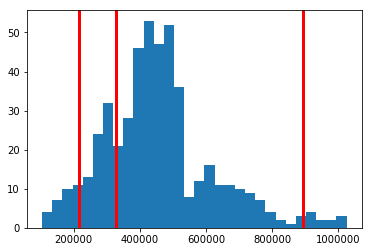

In [32]:
import matplotlib.pyplot as plt
plt.hist(prices, bins=30)
for price in reg.predict(client_data):
    plt.axvline(price, c='r', lw=3)

the above histogram was a suggestion of the reviewer - housing prices of data set and see where my predictions fall. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.